# Project Summary: Car Insurance Claims Analysis

In this project, we analyze a dataset related to car insurance claims to understand the factors that influence whether a customer will file a claim. Our primary objective is to identify which feature of the dataset serves as the best predictor for insurance claims, as indicated by the "outcome" column (where `0` represents no claim and `1` represents a claim).

## Main Question
**From this data sample, what are the risks we need to consider of customers who may put a claim?**

**What is the single feature of the data that is the best predictor of whether a customer will put in a claim?**

To answer this question, we employed logistic regression modeling using the `statsmodels` library. We systematically evaluated each feature in the dataset, calculating the accuracy of predictions based on each feature. The feature with the highest accuracy was identified as the best predictor of insurance claims.

The following code sections detail the data preprocessing steps, the exploratory data analysis (EDA) conducted, and the modeling process used to derive insights from the data.


In [1]:
# Installing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [2]:
# Importing data
car_insurance = pd.read_csv('/Users/wisthof/Downloads/workspace 4/car_insurance.csv')


## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [3]:
car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
car_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [5]:
#Transforming values to categories then coding it then transforming back to categories
car_insurance['driving_experience'] = car_insurance['driving_experience'].astype('category').cat.codes
car_insurance['driving_experience'] = car_insurance['driving_experience'].astype('category')

car_insurance['vehicle_ownership'] = car_insurance['vehicle_ownership'].astype('category').cat.codes
car_insurance['vehicle_ownership'] = car_insurance['vehicle_ownership'].astype('category')

car_insurance['vehicle_year'] = car_insurance['vehicle_year'].astype('category').cat.codes
car_insurance['vehicle_year'] = car_insurance['vehicle_year'].astype('category')

car_insurance['married'] = car_insurance['married'].astype('category').cat.codes
car_insurance['married'] = car_insurance['married'].astype('category')

car_insurance['outcome'] = car_insurance['outcome'].astype('category')

car_insurance = pd.get_dummies(car_insurance, columns=['education', 'income', 'vehicle_type'], drop_first=False)

In [6]:
car_insurance.head()

,id,age,gender,driving_experience,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,...,outcome,education_high school,education_none,education_university,income_middle class,income_poverty,income_upper class,income_working class,vehicle_type_sedan,vehicle_type_sports car
0,569520,3,0,0,0.629027,1,0,0,1.0,10238,...,0.0,True,False,False,False,False,True,False,True,False
1,750365,0,1,0,0.357757,0,1,0,0.0,10238,...,1.0,False,True,False,False,True,False,False,True,False
2,199901,0,0,0,0.493146,1,1,0,0.0,10238,...,0.0,True,False,False,False,False,False,True,True,False
3,478866,0,1,0,0.206013,1,1,0,1.0,32765,...,0.0,False,False,True,False,False,False,True,True,False
4,731664,1,1,1,0.388366,1,1,0,0.0,32765,...,1.0,False,True,False,False,False,False,True,True,False


In [7]:
car_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       10000 non-null  int64   
 1   age                      10000 non-null  int64   
 2   gender                   10000 non-null  int64   
 3   driving_experience       10000 non-null  category
 4   credit_score             9018 non-null   float64 
 5   vehicle_ownership        10000 non-null  category
 6   vehicle_year             10000 non-null  category
 7   married                  10000 non-null  category
 8   children                 10000 non-null  float64 
 9   postal_code              10000 non-null  int64   
 10  annual_mileage           9043 non-null   float64 
 11  speeding_violations      10000 non-null  int64   
 12  duis                     10000 non-null  int64   
 13  past_accidents           10000 non-null  int64   
 14  outcome

In [8]:
# Handeling missing values
car_insurance['credit_score'] = car_insurance['credit_score'].fillna(car_insurance['credit_score'].mean())
car_insurance['annual_mileage'] = car_insurance['annual_mileage'].fillna(car_insurance['annual_mileage'].mean())

Plotting features to understand more about their relationship vs outcome.

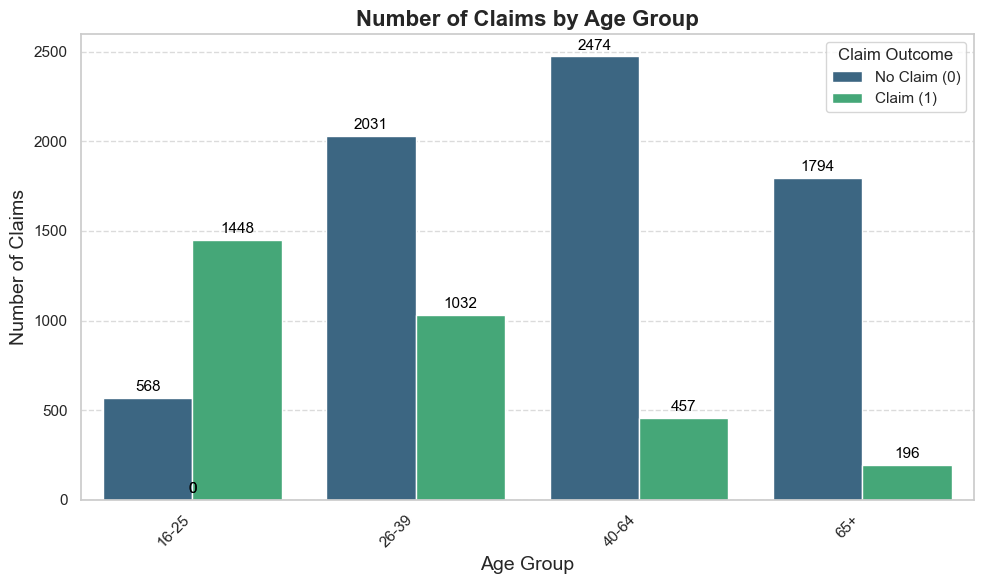

In [9]:
# Plotting age vs outcome
# Setting a style for better aesthetics
sns.set(style="whitegrid")

# Countplot for Age vs Outcome
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='age', hue='outcome', data=car_insurance, palette='viridis')

plt.title('Number of Claims by Age Group', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(ticks=ax.get_xticks(), labels=['16-25', '26-39', '40-64', '65+'], rotation=45, ha='right')

# Add legend title and adjust position
plt.legend(title='Claim Outcome', loc='upper right', labels=['No Claim (0)', 'Claim (1)'])

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Add gridlines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Analysis of Number of Claims by Age Group

- **Age Group 0 (Youngest Group)**:
  - This group has **more claims (`outcome = 1`)** compared to no claims (`outcome = 0`).
  - Indicates a **higher likelihood** of making claims in younger age groups.

- **Age Group 1**:
  - The number of claims (`outcome = 1`) is still quite high, but **no claims (`outcome = 0`)** are slightly more common.
  - Suggests that risk decreases slightly as age increases compared to Group 0.

- **Age Group 2**:
  - The majority of customers in this age group **do not make claims** (`outcome = 0`), with a **significantly lower number** making claims (`outcome = 1`).
  - Indicates a **decreasing trend in claims** with increasing age.

- **Age Group 3 (Oldest Group)**:
  - There is a **considerable difference** between the number of no claims (`outcome = 0`) and claims (`outcome = 1`).
  - This suggests that older customers are **much less likely** to make claims.

#### Summary
- **Younger age groups** (Age Groups 0 and 1) are **more likely** to make insurance claims compared to older groups.
- **Age Group 2 and Age Group 3** show a clear trend of **fewer claims**, indicating that **claim likelihood decreases with age**.
- Age is likely a significant factor in predicting claim outcomes, with younger individuals being at a **higher risk** of making claims.

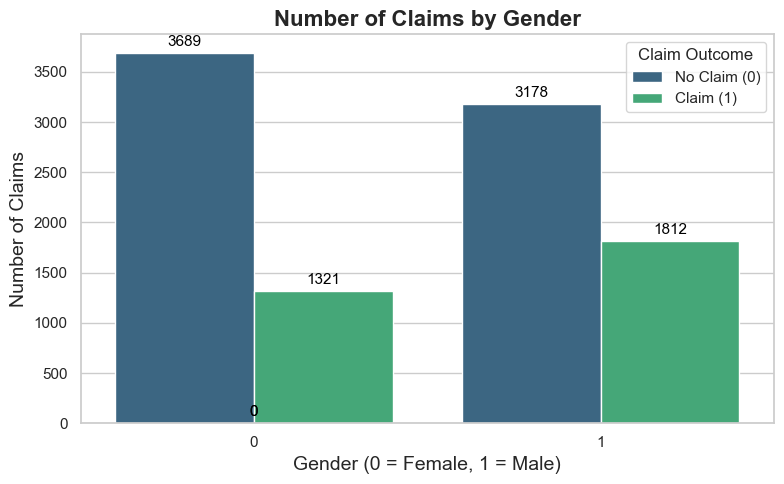

In [10]:
#Plotting gender vs outcome
# Countplot for Gender vs Outcome
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plotting with enhanced colors and labels
ax = sns.countplot(x='gender', hue='outcome', data=car_insurance, palette='viridis')

# Adding title and axis labels
plt.title('Number of Claims by Gender', fontsize=16, weight='bold')
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the legend
plt.legend(title='Claim Outcome', labels=['No Claim (0)', 'Claim (1)'], loc='upper right')

# Adjust layout for readability
plt.tight_layout()
plt.show()

### Analysis of Count of Claims by Gender

- **Gender 0 (Female)**:
  - The number of **no claims (`outcome = 0`)** is significantly higher compared to the number of claims (`outcome = 1`).
  - Suggests that **females** are **less likely** to make claims overall.

- **Gender 1 (Male)**:
  - While males also have a higher count of **no claims** (`outcome = 0`), the **proportion of claims (`outcome = 1`)** is relatively larger compared to females.
  - Indicates that **males** are **more likely** to make insurance claims compared to females.

#### Summary
- Both genders show **more no claims than claims**, but the **difference is larger for females**.
- **Males** have a **higher proportion of claims**, indicating a **higher risk** of making claims compared to females.
- **Gender** appears to play a role in the likelihood of making a claim, with males being at **higher risk**.

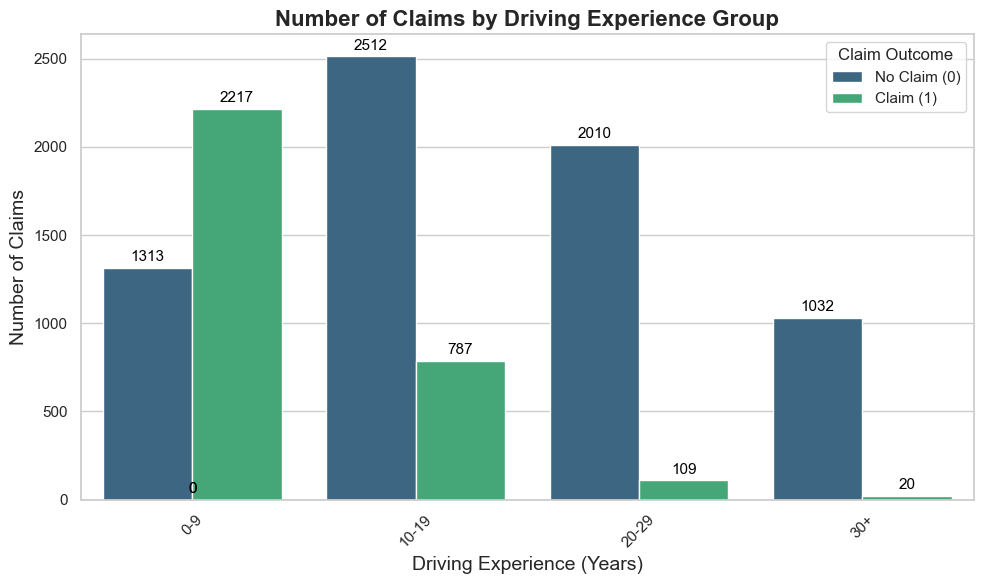

In [11]:
# Plotting driving experience vs outcome
# Countplot for Driving Experience vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with enhanced colors and labels
ax = sns.countplot(x='driving_experience', hue='outcome', data=car_insurance, palette='viridis')

# Adding title and axis labels
plt.title('Number of Claims by Driving Experience Group', fontsize=16, weight='bold')
plt.xlabel('Driving Experience (Years)', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)

# Setting the x-tick labels to be more descriptive
plt.xticks(ticks=ax.get_xticks(), labels=['0-9', '10-19', '20-29', '30+'], rotation=45)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the legend
plt.legend(title='Claim Outcome', labels=['No Claim (0)', 'Claim (1)'], loc='upper right')

# Adjust layout for readability
plt.tight_layout()
plt.show()

### Analysis of Claims by Driving Experience

- **Driving Experience Group 0 (0-9 years)**:
  - The number of customers making claims (`outcome = 1`) is **higher** than those not making claims (`outcome = 0`).
  - This suggests that **less experienced drivers** are **more likely** to make claims.

- **Driving Experience Group 1 (10-19 years)**:
  - Customers with this level of driving experience have **more no claims** (`outcome = 0`) compared to claims, but claims are still relatively common.
  - This indicates a **decreasing claim likelihood** compared to Group 0 but still a notable number of claims.

- **Driving Experience Group 2 (20-29 years)**:
  - This group has a **significant number of no claims**, and very few claims (`outcome = 1`).
  - It indicates that drivers with **moderate experience** are much **less likely** to make claims.

- **Driving Experience Group 3 (30+ years)**:
  - The majority of customers in this group have **no claims**, with claims (`outcome = 1`) being **rare**.
  - **Highly experienced drivers** are the **least likely** to make claims.

#### Summary
- **Less experienced drivers (0-9 years)** are **most likely** to make claims, while the likelihood of making claims decreases significantly with **more driving experience**.
- **Highly experienced drivers (20+ years)** are **much less likely** to make claims, indicating that driving experience is an important factor in predicting claim outcomes.


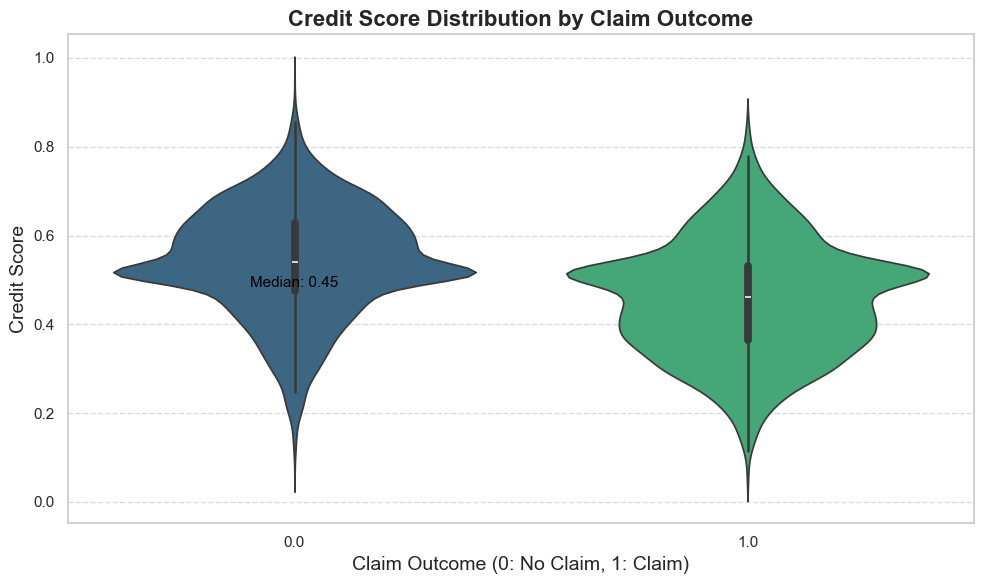

In [12]:
# Plotting credit_score vs outcome
# Violin plot for Credit Score vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with updated settings to avoid the warning
ax = sns.violinplot(x='outcome', y='credit_score', hue='outcome', data=car_insurance, palette='viridis', legend=False)

# Adding title and axis labels
plt.title('Credit Score Distribution by Claim Outcome', fontsize=16, weight='bold')
plt.xlabel('Claim Outcome (0: No Claim, 1: Claim)', fontsize=14)
plt.ylabel('Credit Score', fontsize=14)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate median lines inside violin plots
for i in range(len(ax.collections) // 2):
    median_line = ax.collections[i * 2 + 1]
    median = median_line.get_paths()[0].vertices[:, 1].mean()
    ax.annotate(f'Median: {median:.2f}', (i, median), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=11, color='black')

# Adjust layout for readability
plt.tight_layout()
plt.show()

### Analysis of Credit Score Distribution by Claim Outcome

- **Credit Score Distribution for `Outcome = 0` (No Claim)**:
  - The distribution is **symmetrical** around the median with values centered around **0.5**.
  - The **interquartile range (IQR)** is slightly broader, indicating some variation in credit scores for customers who did not make a claim.
  
- **Credit Score Distribution for `Outcome = 1` (Claim)**:
  - The distribution is also fairly symmetrical with values concentrated around **0.5**.
  - The **IQR** appears slightly narrower compared to those who did not make a claim, suggesting a more concentrated distribution.

#### Summary
- The **distribution of credit scores** is quite similar between customers who made a claim and those who did not.
- There is no significant difference in **median** or **spread**, indicating that **credit score** alone may not be a strong predictor of whether a customer will make a claim.
- Credit scores for both groups tend to cluster around the **mid-range** (0.5), with no apparent bias toward higher or lower values.

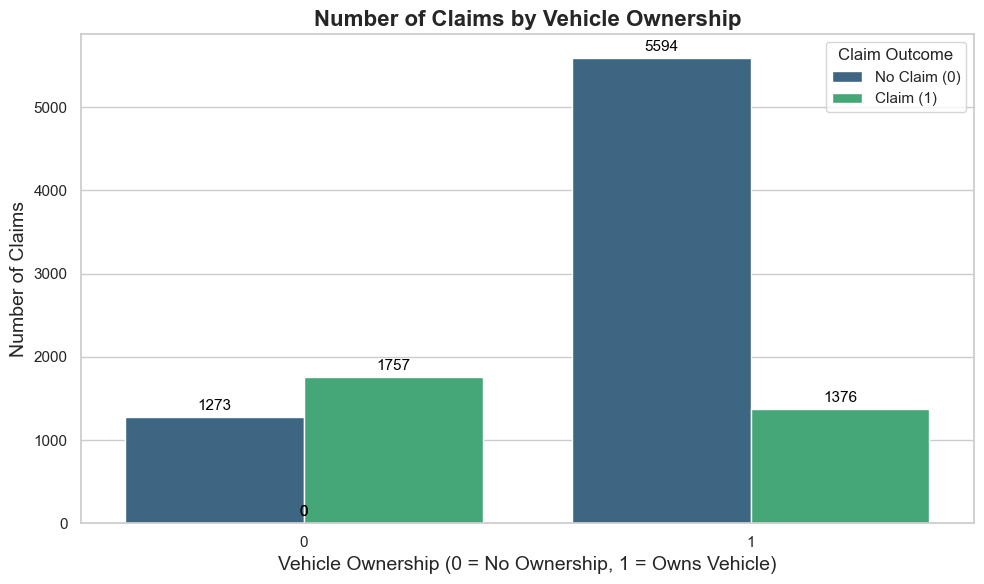

In [13]:
# Plotting the vehicle_ownership vs outcome
# Countplot for Vehicle Ownership vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with enhanced colors and labels
ax = sns.countplot(x='vehicle_ownership', hue='outcome', data=car_insurance, palette='viridis')

# Adding title and axis labels
plt.title('Number of Claims by Vehicle Ownership', fontsize=16, weight='bold')
plt.xlabel('Vehicle Ownership (0 = No Ownership, 1 = Owns Vehicle)', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the legend
plt.legend(title='Claim Outcome', labels=['No Claim (0)', 'Claim (1)'], loc='upper right')

# Adjust layout for readability
plt.tight_layout()
plt.show()

### Analysis of Claims by Vehicle Ownership

- **Vehicle Ownership (`0` - No Vehicle Owned)**:
  - The number of claims (`outcome = 1`) is **higher** than the number of no claims (`outcome = 0`).
  - This suggests that customers without vehicle ownership have a **higher likelihood** of making a claim.

- **Vehicle Ownership (`1` - Owns Vehicle)**:
  - There is a **significant difference** between those with no claims (`outcome = 0`) and those making claims (`outcome = 1`), with **no claims being much more common**.
  - Indicates that customers who **own their vehicles** are **less likely** to make claims.

#### Summary
- Customers without **vehicle ownership** are **more likely** to make claims, whereas those who **own a vehicle** tend to make **fewer claims**.
- **Vehicle ownership** is a significant factor, with **non-owners** being at a **higher risk** of making claims.

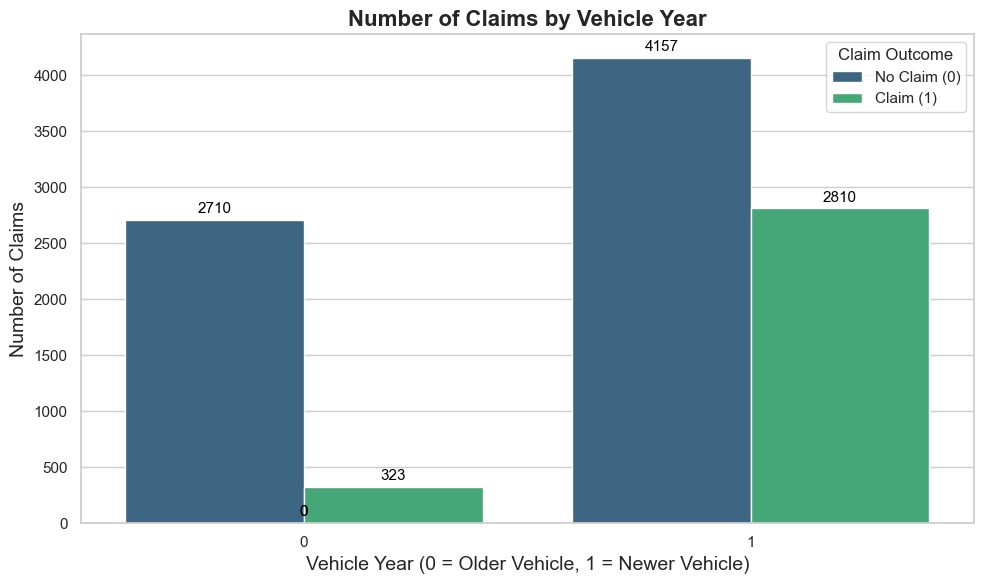

In [14]:
# Plotting the vehicle_year vs outcome
# Countplot for Vehicle Year vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with enhanced colors and labels
ax = sns.countplot(x='vehicle_year', hue='outcome', data=car_insurance, palette='viridis')

# Adding title and axis labels
plt.title('Number of Claims by Vehicle Year', fontsize=16, weight='bold')
plt.xlabel('Vehicle Year (0 = Older Vehicle, 1 = Newer Vehicle)', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the legend
plt.legend(title='Claim Outcome', labels=['No Claim (0)', 'Claim (1)'], loc='upper right')

# Adjust layout for readability
plt.tight_layout()
plt.show()

### Analysis of Claims by Vehicle Year

- **Vehicle Year (`0` - Older Vehicle)**:
  - The majority of customers with older vehicles have **no claims (`outcome = 0`)**, while the number of claims (`outcome = 1`) is relatively **low**.
  - This suggests that customers with **older vehicles** are less likely to make a claim.

- **Vehicle Year (`1` - Newer Vehicle)**:
  - There is a more balanced distribution between claims and no claims, with a significant number of **claims (`outcome = 1`)**.
  - This indicates that customers with **newer vehicles** are **more likely** to make a claim compared to those with older vehicles.

#### Summary
- Customers with **newer vehicles** are **more likely** to make insurance claims, while those with **older vehicles** have a lower claim frequency.
- The **age of the vehicle** appears to be a significant factor in predicting claim outcomes, with **newer vehicles** correlating with a higher risk of making claims.


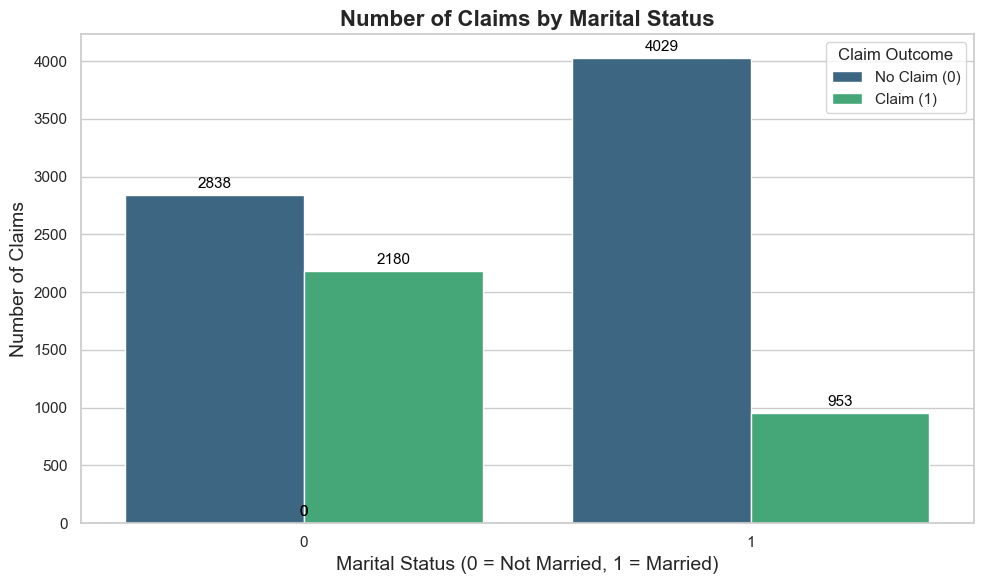

In [15]:
# Plotting married vs outcome
# Countplot for Marital Status vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with enhanced colors and labels
ax = sns.countplot(x='married', hue='outcome', data=car_insurance, palette='viridis')

# Adding title and axis labels
plt.title('Number of Claims by Marital Status', fontsize=16, weight='bold')
plt.xlabel('Marital Status (0 = Not Married, 1 = Married)', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the legend
plt.legend(title='Claim Outcome', labels=['No Claim (0)', 'Claim (1)'], loc='upper right')

# Adjust layout for readability
plt.tight_layout()
plt.show()


### Analysis of Claims by Marital Status

- **Marital Status (`0` - Not Married)**:
  - There is a relatively **high number of claims (`outcome = 1`)**, and the number of no claims (`outcome = 0`) is only slightly higher.
  - This suggests that customers who are **not married** have a **higher likelihood** of making claims compared to those who are married.

- **Marital Status (`1` - Married)**:
  - There is a significant difference between those with no claims (`outcome = 0`) and those making claims (`outcome = 1`), with **no claims being much more common**.
  - This indicates that **married customers** are **less likely** to make insurance claims.

#### Summary
- Customers who are **not married** have a **higher probability** of making a claim compared to those who are married.
- Being **married** appears to correlate with a **reduced risk** of making insurance claims, possibly indicating a more cautious approach to risk.

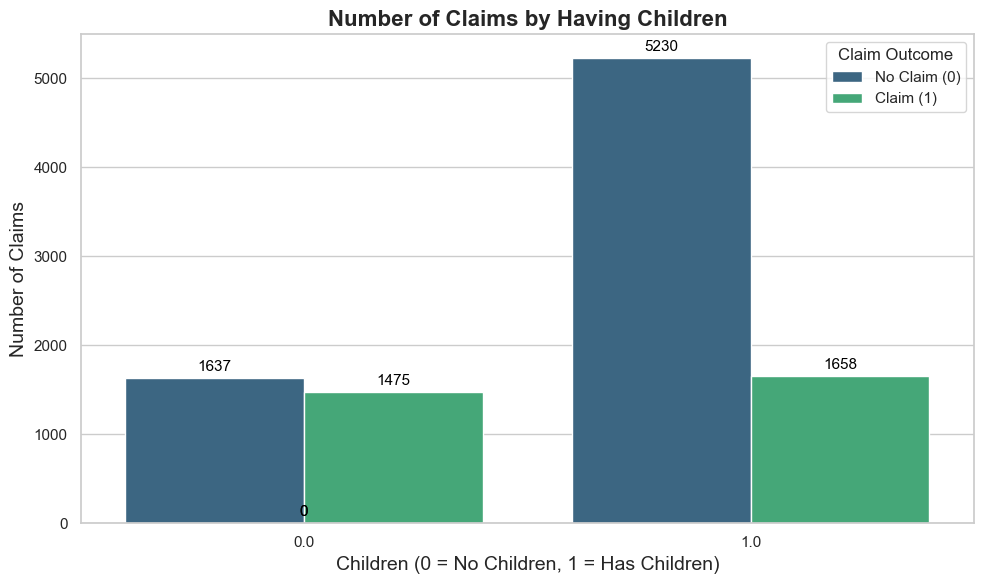

In [16]:
# Plotting children vs outcome
# Countplot for Children vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with enhanced colors and labels
ax = sns.countplot(x='children', hue='outcome', data=car_insurance, palette='viridis')

# Adding title and axis labels
plt.title('Number of Claims by Having Children', fontsize=16, weight='bold')
plt.xlabel('Children (0 = No Children, 1 = Has Children)', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the legend
plt.legend(title='Claim Outcome', labels=['No Claim (0)', 'Claim (1)'], loc='upper right')

# Adjust layout for readability
plt.tight_layout()
plt.show()

### Analysis of Claims by Having Children

- **No Children (`0.0`)**:
  - There is a **similar number** of claims (`outcome = 1`) and no claims (`outcome = 0`), suggesting a relatively **balanced** distribution.
  - This indicates that customers **without children** are **moderately likely** to make claims.

- **Having Children (`1.0`)**:
  - The number of **no claims (`outcome = 0`)** is significantly higher compared to claims (`outcome = 1`).
  - This suggests that customers **with children** are **less likely** to make insurance claims.

#### Summary
- Customers **without children** have a **higher probability** of making a claim, while those **with children** are more likely to **not make claims**.
- Having **children** appears to correlate with a **reduced risk** of making insurance claims, possibly indicating a more cautious approach to driving and risk-taking behavior.


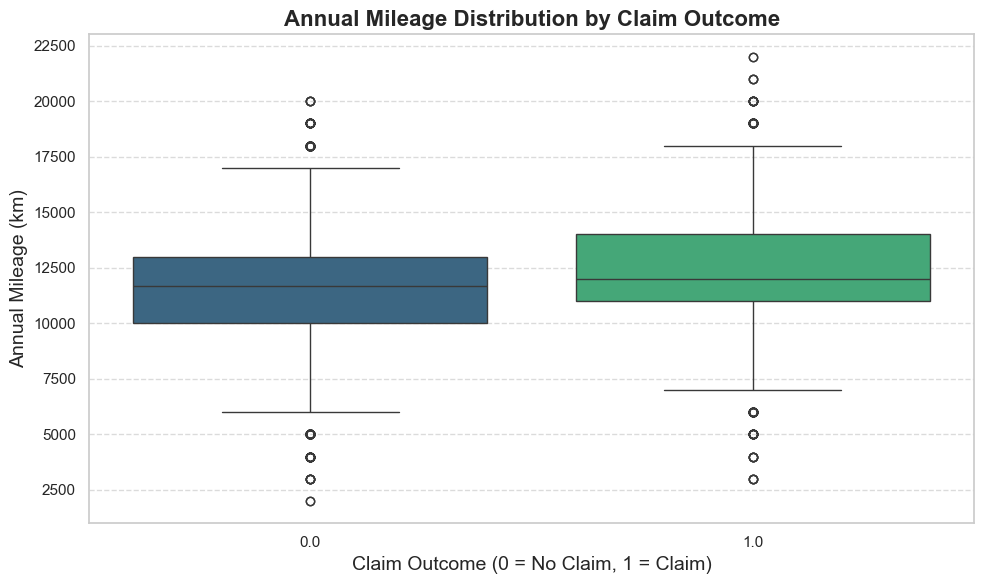

In [17]:
# Plotting annual_mileage vs outcome
# Boxplot for Annual Mileage vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with updated settings to avoid the warning
ax = sns.boxplot(x='outcome', y='annual_mileage', hue='outcome', data=car_insurance, palette='viridis', legend=False)

# Adding title and axis labels
plt.title('Annual Mileage Distribution by Claim Outcome', fontsize=16, weight='bold')
plt.xlabel('Claim Outcome (0 = No Claim, 1 = Claim)', fontsize=14)
plt.ylabel('Annual Mileage (km)', fontsize=14)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate median lines inside box plots
for i, box in enumerate(ax.artists):
    median_line = ax.lines[i * 6 + 3]  # Get the line object corresponding to the median
    median = median_line.get_ydata()[0]
    ax.annotate(f'Median: {median:.2f}', (i, median), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=11, color='black')

# Adjust layout for readability
plt.tight_layout()
plt.show()


### Analysis of Annual Mileage by Claim Outcome

- **Outcome (`0.0` - No Claim)**:
  - The median annual mileage for customers without claims is around **12,500 km**.
  - The **interquartile range (IQR)** is between approximately **8,500 km and 15,000 km**, showing a moderate spread of annual mileage.
  - There are a few **outliers** with very low or very high mileage.

- **Outcome (`1.0` - Claim)**:
  - The median annual mileage for customers who made claims is slightly **higher** than those without claims.
  - The **IQR** is also slightly broader, suggesting more variation among customers making claims.
  - There are more **outliers** at the higher mileage end, indicating that customers with higher annual mileage might be more likely to make a claim.

#### Summary
- Customers who made a claim tend to have a **slightly higher median annual mileage** compared to those who did not.
- There is more **variation** in annual mileage among customers who made claims, and a higher number of **outliers** at high mileage, indicating that **increased annual mileage** might correlate with a **higher likelihood** of making a claim.

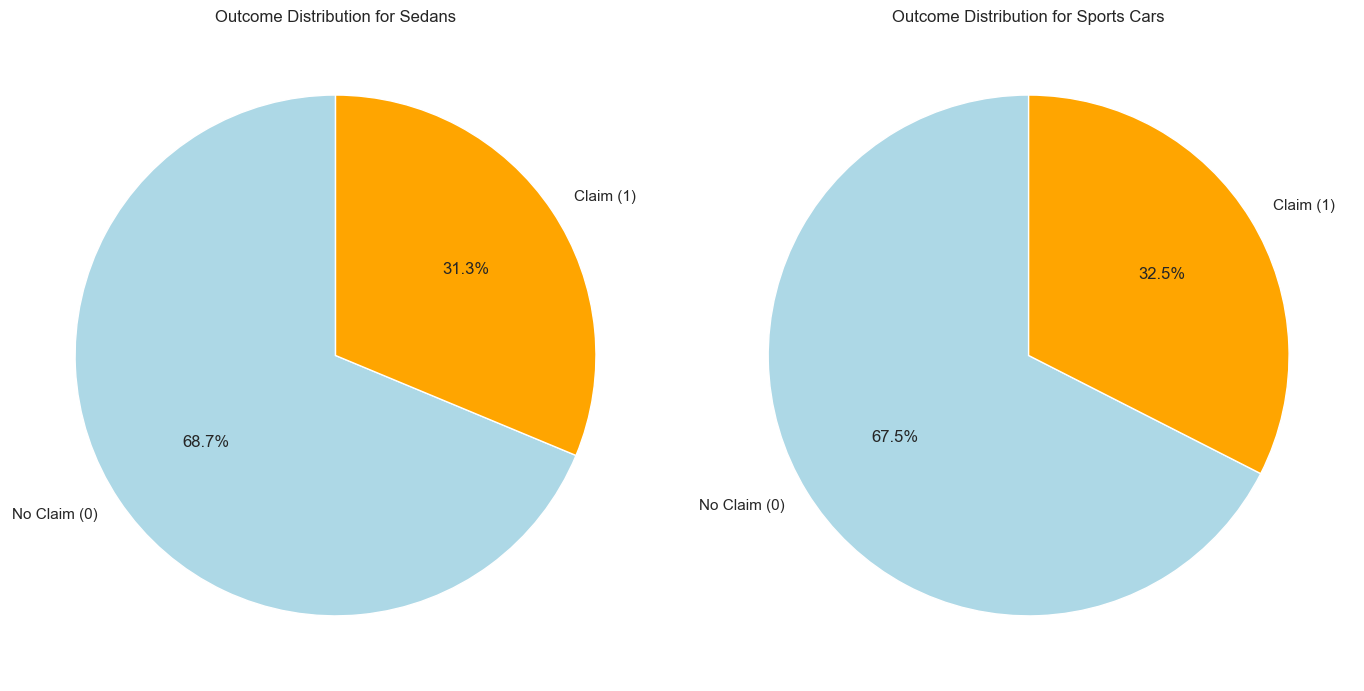

In [18]:
# Plotting sedan & sports cars vs outcome
sedan_outcome_counts = car_insurance[car_insurance['vehicle_type_sedan'] == 1]['outcome'].value_counts()
sports_car_outcome_counts = car_insurance[car_insurance['vehicle_type_sports car'] == 1]['outcome'].value_counts()

# Plot Pie Charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Sedans
axes[0].pie(sedan_outcome_counts, labels=['No Claim (0)', 'Claim (1)'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
axes[0].set_title('Outcome Distribution for Sedans')

# Pie chart for Sports Cars
axes[1].pie(sports_car_outcome_counts, labels=['No Claim (0)', 'Claim (1)'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
axes[1].set_title('Outcome Distribution for Sports Cars')

# Show plot
plt.tight_layout()
plt.show()

### Analysis of Outcome Distribution for Vehicle Types

#### **Sedans**:
- **No Claim (`0`)**: Represents **68.7%** of the outcomes.
- **Claim (`1`)**: Represents **31.3%** of the outcomes.
- This indicates that a significant majority of **sedan owners** do not make insurance claims, suggesting that sedan owners are generally less risky.

#### **Sports Cars**:
- **No Claim (`0`)**: Represents **67.5%** of the outcomes.
- **Claim (`1`)**: Represents **32.5%** of the outcomes.
- While **sports car owners** also tend not to make claims, the percentage of **claims (`32.5%`)** is slightly higher compared to sedan owners, indicating that sports car owners might pose a marginally higher risk.

#### Summary
- Both **sedan** and **sports car** owners have a similar tendency not to make claims, but the proportion of claims is **slightly higher for sports cars**.
- This suggests that **vehicle type** plays a role in the likelihood of making a claim, with **sports cars** having a marginally increased risk compared to **sedans**.

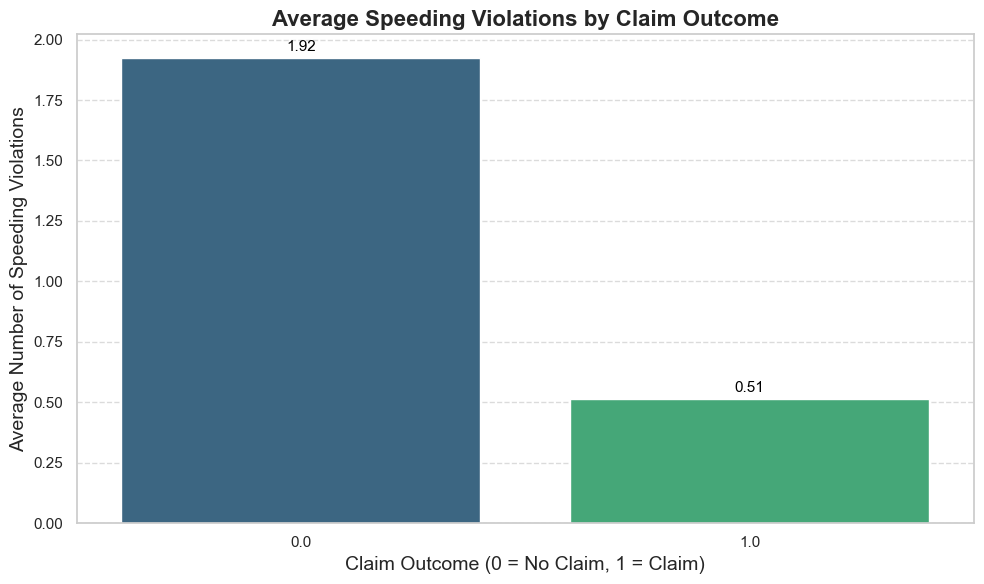

In [19]:
# plotting speeding violations vs outcome
# Barplot for Speeding Violations vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with updated settings to avoid the warning
ax = sns.barplot(x='outcome', y='speeding_violations', hue='outcome', data=car_insurance, errorbar=None, palette='viridis', dodge=False, legend=False)

# Adding title and axis labels
plt.title('Average Speeding Violations by Claim Outcome', fontsize=16, weight='bold')
plt.xlabel('Claim Outcome (0 = No Claim, 1 = Claim)', fontsize=14)
plt.ylabel('Average Number of Speeding Violations', fontsize=14)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for readability
plt.tight_layout()
plt.show()

### Analysis of Speeding Violations by Claim Outcome

- **Outcome (`0.0` - No Claim)**:
  - The average number of speeding violations is around **1.8**, which is significantly higher compared to customers who made a claim.
  - This suggests that individuals who did **not make a claim** tend to have more speeding violations on average.

- **Outcome (`1.0` - Claim)**:
  - The average number of speeding violations is around **0.6**, which is much lower compared to those with no claims.
  - This indicates that customers who **make a claim** tend to have fewer speeding violations on average.

#### Summary
- Surprisingly, individuals with **more speeding violations** are **less likely to make a claim**, while those with fewer violations have a higher claim rate.
- This might indicate that individuals with more violations are potentially more cautious in other aspects or that speeding violations do not directly correlate with an increased likelihood of filing an insurance claim.

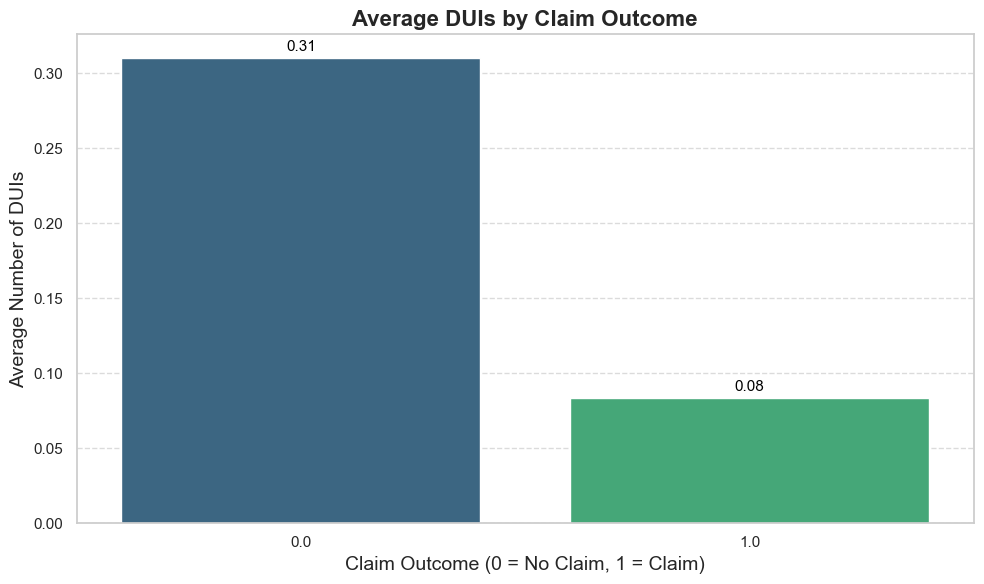

In [20]:
# plotting duis vs outcome
# Barplot for DUIs vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with enhanced settings to avoid the warning
ax = sns.barplot(x='outcome', y='duis', hue='outcome', data=car_insurance, errorbar=None, palette='viridis', dodge=False, legend=False)

# Adding title and axis labels
plt.title('Average DUIs by Claim Outcome', fontsize=16, weight='bold')
plt.xlabel('Claim Outcome (0 = No Claim, 1 = Claim)', fontsize=14)
plt.ylabel('Average Number of DUIs', fontsize=14)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for readability
plt.tight_layout()
plt.show()


### Analysis of DUIs by Claim Outcome

- **Outcome (`0.0` - No Claim)**:
  - The average number of DUIs (Driving Under the Influence) is **0.3**.
  - This suggests that individuals who did **not make a claim** tend to have more incidents of DUIs on average.

- **Outcome (`1.0` - Claim)**:
  - The average number of DUIs for customers who made a claim is **0.1**, which is much lower compared to those with no claims.
  - This indicates that individuals who **make a claim** tend to have fewer DUI incidents on average.

#### Summary
- **Higher average DUI incidents** are observed among customers who do **not make claims**, while customers with **fewer DUIs** are more likely to file a claim.
- This finding suggests that having more DUI incidents does not necessarily correlate with an increased likelihood of making a claim. It might imply that individuals with **DUIs** adopt different risk behaviors that do not necessarily lead to claims.

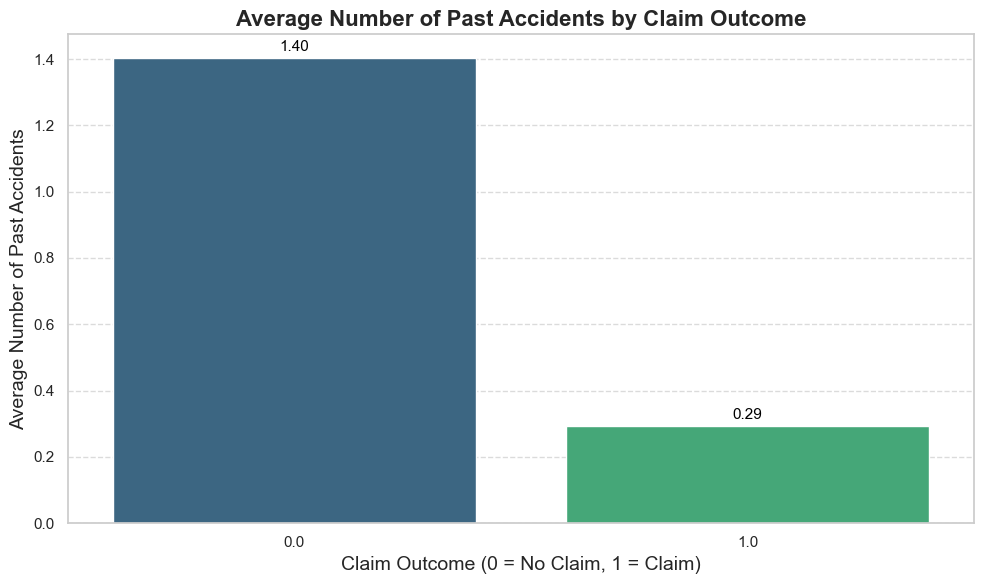

In [21]:
# Plotting past accidents vs outcome
# Barplot for Past Accidents vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with enhanced settings to avoid the warning
ax = sns.barplot(x='outcome', y='past_accidents', hue='outcome', data=car_insurance, errorbar=None, palette='viridis', dodge=False, legend=False)

# Adding title and axis labels
plt.title('Average Number of Past Accidents by Claim Outcome', fontsize=16, weight='bold')
plt.xlabel('Claim Outcome (0 = No Claim, 1 = Claim)', fontsize=14)
plt.ylabel('Average Number of Past Accidents', fontsize=14)

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for readability
plt.tight_layout()
plt.show()


### Analysis of Past Accidents by Claim Outcome

- **Outcome (`0.0` - No Claim)**:
  - The average number of past accidents is **1.4**, which is significantly higher compared to those who made a claim.
  - This suggests that individuals who did **not make a claim** have a **higher history of past accidents**.

- **Outcome (`1.0` - Claim)**:
  - The average number of past accidents for customers who made a claim is **0.3**, much lower compared to those who did not make a claim.
  - Indicates that individuals who **make a claim** tend to have fewer past accidents on average.

#### Summary
- Customers with **more past accidents** are **less likely** to file an insurance claim, whereas customers with **fewer past accidents** are more likely to make a claim.
- This result suggests that **past accident history** might not directly increase the likelihood of filing a claim, indicating that customers with more past accidents may adopt safer driving practices to avoid future incidents.

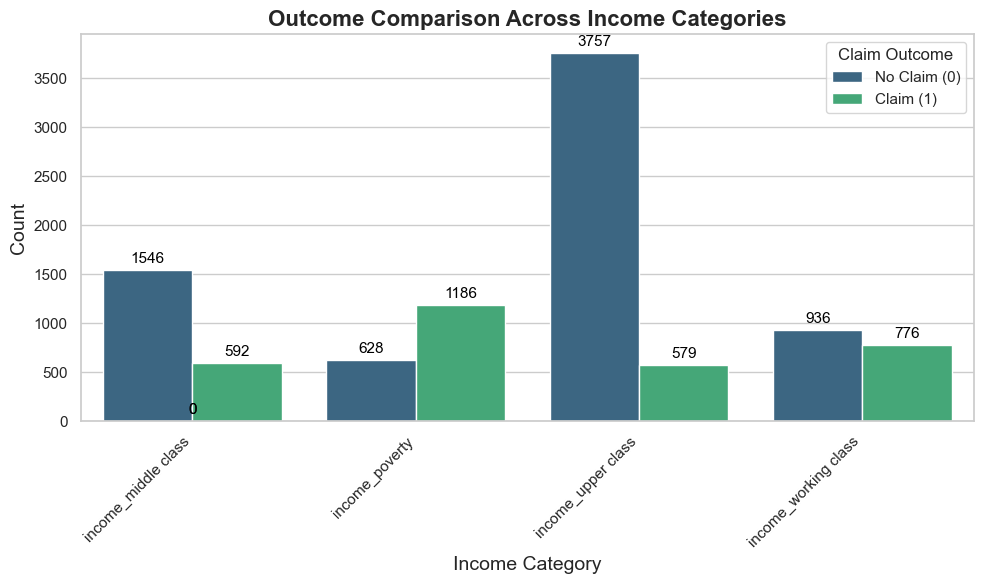

In [22]:
# Plotting income categories vs outcome
# Melting the DataFrame to have income categories as a single column
# Melting the DataFrame to have income categories as a single column
income_cols = ['income_middle class', 'income_poverty', 'income_upper class', 'income_working class']
car_insurance_melted = car_insurance.melt(id_vars=['outcome'], 
                                          value_vars=income_cols, 
                                          var_name='income_category', 
                                          value_name='is_income')

# Filtering out rows where `is_income` is False
car_insurance_melted = car_insurance_melted[car_insurance_melted['is_income'] == True]

# Enhanced countplot for Income Categories vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with enhanced colors and labels
ax = sns.countplot(x='income_category', hue='outcome', data=car_insurance_melted, palette='viridis')

# Adding title and axis labels
plt.title('Outcome Comparison Across Income Categories', fontsize=16, weight='bold')
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the legend
plt.legend(title='Claim Outcome', labels=['No Claim (0)', 'Claim (1)'], loc='upper right')

# Adjust layout for readability
plt.tight_layout()
plt.show()

### Analysis of Income Categories vs. Outcome

- **Upper class**: 
  - Significantly more customers have no claims (`outcome = 0`) compared to claims (`outcome = 1`).
- **Middle class** and **working class**:
  - Show a **somewhat balanced distribution** between claims and no claims, though more customers tend not to make claims.
- **Poverty** category:
  - Has a relatively **even split** between claim and no claim outcomes.

#### Summary
- **Upper class** customers are **less likely** to make claims compared to other income groups.
- **Poverty** customers show a **higher likelihood** of making claims, suggesting a different risk profile compared to the other groups.


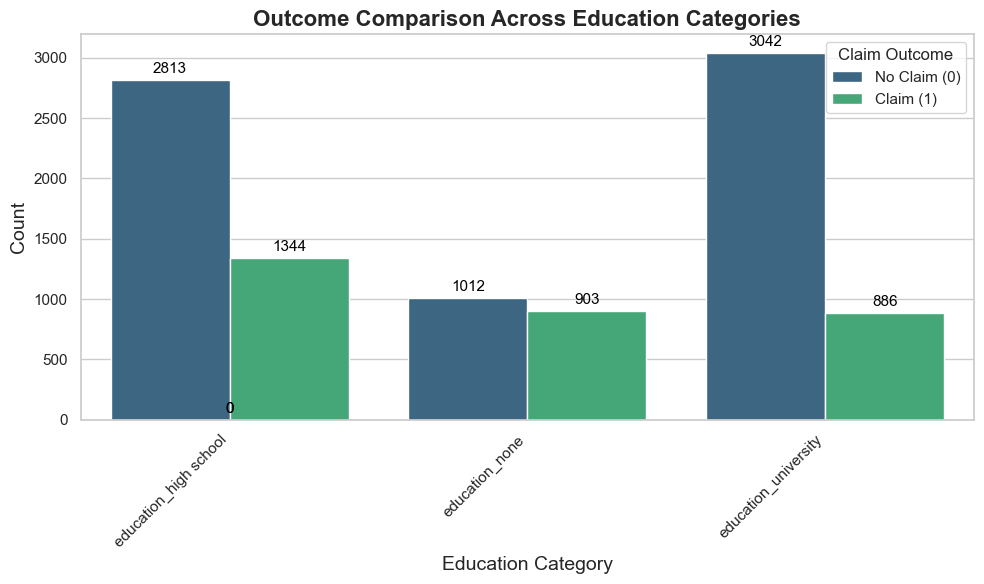

In [23]:
# Plotting education categories vs outcome
# List of education columns
education_cols = ['education_high school', 'education_none', 'education_university']

# Melt the DataFrame to have education categories as a single column
car_insurance_melted = car_insurance.melt(id_vars=['outcome'], 
                                          value_vars=education_cols, 
                                          var_name='education_category', 
                                          value_name='is_education')

# Filter out rows where `is_education` is False
car_insurance_melted = car_insurance_melted[car_insurance_melted['is_education'] == True]

# Enhanced countplot for Education Categories vs Outcome
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting with enhanced colors and labels
ax = sns.countplot(x='education_category', hue='outcome', data=car_insurance_melted, palette='viridis')

# Adding title and axis labels
plt.title('Outcome Comparison Across Education Categories', fontsize=16, weight='bold')
plt.xlabel('Education Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the legend
plt.legend(title='Claim Outcome', labels=['No Claim (0)', 'Claim (1)'], loc='upper right')

# Adjust layout for readability
plt.tight_layout()
plt.show()


### Analysis of Education Categories vs. Outcome

- **High School Education**:
  - There is a **substantial difference** between the number of customers who have no claims (`outcome = 0`) and those who do make claims (`outcome = 1`).
  - **No claim** count is significantly higher than the claim count, suggesting that customers with a high school education are more likely to **not make claims**.

- **No Formal Education**:
  - The number of claims (`outcome = 1`) and no claims (`outcome = 0`) is **more balanced** compared to the other education groups.
  - This suggests that customers without formal education have a **higher likelihood of making claims** compared to those with other education levels.

- **University Education**:
  - There is a **large gap** between those who do not make claims and those who do, with the **no claim** count being much higher.
  - This indicates that customers with a **university education** are the **least likely** to make claims among all education categories.

#### Summary
- Customers with **university education** tend to make **fewer claims** compared to those with high school or no formal education.
- The group with **no formal education** has a relatively **high proportion of claims**, making them a potentially riskier category.
- Education appears to be **inversely related to claim likelihood**, with **higher education levels** correlating with a **lower chance of making a claim**.

### Answeing Question: Identifying the Best Predictor for Insurance Claims

In our analysis, we aim to determine which feature of the dataset serves as the **best predictor** for whether a customer will file an insurance claim, indicated by the "outcome" column. This inquiry is crucial for understanding the factors that influence claim behavior and can help in risk assessment, underwriting processes, and targeted marketing strategies.

#### Objectives:
- **Feature Evaluation**: We will evaluate each feature in the dataset (excluding the ID column) to assess its predictive power regarding the likelihood of a claim.
- **Logistic Regression Modeling**: We will utilize logistic regression modeling via the `statsmodels` library to quantify the relationship between each feature and the outcome variable. This approach allows us to estimate the probabilities of making a claim based on individual features.
- **Accuracy Measurement**: The accuracy of each model will be computed, enabling us to identify which feature yields the highest accuracy in predicting claims.

#### Expected Outcome:
- The analysis will culminate in a DataFrame that contains the name of the feature with the highest accuracy and its corresponding accuracy score. This information will provide valuable insights into the characteristics that most significantly influence claim likelihood.

In [24]:
# Preparing the dataframe by dropping the id column
car_insurance_encoded = car_insurance.drop(columns=['id'])

In [25]:
car_insurance_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      10000 non-null  int64   
 1   gender                   10000 non-null  int64   
 2   driving_experience       10000 non-null  category
 3   credit_score             10000 non-null  float64 
 4   vehicle_ownership        10000 non-null  category
 5   vehicle_year             10000 non-null  category
 6   married                  10000 non-null  category
 7   children                 10000 non-null  float64 
 8   postal_code              10000 non-null  int64   
 9   annual_mileage           10000 non-null  float64 
 10  speeding_violations      10000 non-null  int64   
 11  duis                     10000 non-null  int64   
 12  past_accidents           10000 non-null  int64   
 13  outcome                  10000 non-null  category
 14  educati

### Finally, answering the question of what is the single feature that has the biggest impact on the dependent feature


In [26]:
# Replacing spaces in the column names
car_insurance_encoded.columns = car_insurance_encoded.columns.str.replace(" ", "_")

In [27]:
# Transforming the outcome column to int type
car_insurance_encoded['outcome'] = car_insurance_encoded['outcome'].astype(int)

# Storing the best feature and accuracy
best_feature = None
best_accuracy = 0

# Looping over each feature to find out the best predictor
for feature in car_insurance_encoded.columns:
    if feature != 'outcome':
        formula = f'outcome ~ {feature}' # Creating formula
        model = smf.logit(formula = formula, data= car_insurance_encoded).fit(disp=0) # Looping over model
        predictions = model.predict() # Generating predictions
        predicted_classes = (predictions >= 0.5).astype(int)
        accuracy = (predicted_classes == car_insurance_encoded['outcome']).mean() # Assessing accuracy of the model for each feature
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature = feature

In [28]:
# Creating the best feature dataframe
best_feature_df = pd.DataFrame({
    "best_feature": [best_feature],
    "best_accuracy": [best_accuracy]})

print(best_feature_df)

         best_feature  best_accuracy
0  driving_experience         0.7771


# Summary of Findings

In this project, we conducted a comprehensive analysis of a car insurance claims dataset to determine the factors influencing customer claims. Our exploratory data analysis (EDA) and subsequent modeling efforts led to several key findings:

1. **Demographic Insights**:
   - **Age**: Younger drivers (ages 16-25) were found to be more likely to make insurance claims, indicating higher risk among this age group.
   - **Gender**: Males exhibited a higher likelihood of making claims compared to females, suggesting differences in driving behavior or risk profiles.

2. **Driving Behavior**:
   - **Driving Experience**: Less experienced drivers (0-9 years) had a higher probability of filing claims, whereas more experienced drivers (30+ years) were less likely to make claims.
   - **Speeding Violations**: Surprisingly, customers with more speeding violations tended to make fewer claims, indicating potential differences in risk perception or claim behavior.

3. **Financial Factors**:
   - **Credit Score**: The distribution of credit scores did not significantly differ between claimants and non-claimants, suggesting that credit score may not be a strong predictor of insurance claims.
   - **Annual Mileage**: Higher annual mileage was associated with an increased likelihood of making a claim, reflecting the potential risk associated with increased exposure.

4. **Family and Social Factors**:
   - **Marital Status**: Unmarried individuals were more likely to file claims compared to married individuals, suggesting that marital status may correlate with driving behavior and risk aversion.
   - **Children**: Customers with children exhibited a lower likelihood of making claims, indicating a potential correlation between family dynamics and cautious driving behavior.

5. **Best Predictor of Claims**:
   - After evaluating all features in the dataset, the analysis revealed that the feature with the highest predictive accuracy for whether a customer would make a claim was driving_experience with accuracy rate of 77%. This feature can be utilized for better risk assessment and decision-making in underwriting processes.

### Conclusion
The findings from this analysis provide valuable insights into customer behavior regarding insurance claims. By understanding these factors, insurance companies can develop more targeted strategies for risk management, marketing, and customer engagement. Further analysis could explore interactions between features or employ more complex modeling techniques to enhance prediction accuracy.
